# 05 Simple Linear Regression

Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

Referensi: [https://en.wikipedia.org/wiki/Simple_linear_regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

## Sample Dataset

In [1]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],
         'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


## Visualisasi Data

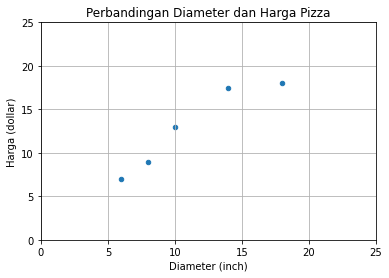

In [2]:
import matplotlib.pyplot as plt 

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

## Simple Linear Regression Model

### Penyesuaian Dataset

In [3]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [4]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

### Training Simple Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Visualisasi Simple Linear Regression Model

In [7]:
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

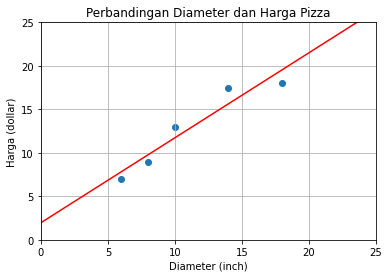

In [8]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Formula Linear Regression: $y = \alpha + \beta x$ 
- $y$: response variable
- $x$: explanatory variable
- $\alpha$: intercept
- $\beta$: slope

In [9]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


### Mencari nilai slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta = \frac{cov(x, y)}{var(x)}$

In [10]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


#### Variance

In [11]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


#### Covariance

In [12]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [13]:
covariance_xy = np.cov(X.transpose(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


#### Slope

In [14]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


### Mencari nilai intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\alpha = \bar{y} - \beta \bar{x}$

In [15]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


### Prediksi Harga Pizza

In [16]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [17]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [18]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} predilsi harga: {hrg}')

Diameter: [12] predilsi harga: 13.681034482758621
Diameter: [20] predilsi harga: 21.491379310344826
Diameter: [23] predilsi harga: 24.42025862068965


### Evaluasi Simple Linear Regression Model

#### Training & Testing Dataset

In [19]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

#### Training Simple Linear Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

Referensi: [https://en.wikipedia.org/wiki/Coefficient_of_determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [21]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


### Mencari nilai R-squared ($R^2$)

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$


$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$


$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$

#### $SS_{res}$

In [22]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


#### $SS_{tot}$

In [23]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


#### $R^2$

In [24]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
